In [1]:
library(tidymodels)
library(tidyverse)
library(plyr)
library(dplyr)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.7
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::c

In [2]:
set.seed(20)
download.file("https://raw.githubusercontent.com/RegalSword/DSCI-Group-123-Project/main/winequality-white.csv",
              destfile = "winequality-white.csv") 

whitewine_df <- read_delim(file = "winequality-white.csv", delim = ";") %>%
         cbind(wine_type = "White") %>%  # combining red and white wine data
         rename(c("fixed acidity" = "fixed_acid", # changing column names to make it easier for selecting and cleaing data
                  "volatile acidity" = "volatile_acid",
                  "citric acid" = "citric_acid",
                  "total sulfur dioxide" = "total_SO2",
                  "residual sugar" = "sugar")) # adding column to distinguish white wine and its components

whitewine_df$quality[whitewine_df$quality == 0] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 1] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 2] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 3] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 4] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 5] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 6] <- "Average"
whitewine_df$quality[whitewine_df$quality == 7] <- "Good"
whitewine_df$quality[whitewine_df$quality == 8] <- "Good"
whitewine_df$quality[whitewine_df$quality == 9] <- "Good"
whitewine_df$quality[whitewine_df$quality == 10] <- "Good"


head(whitewine_df) # Demonstrates that the dataset can be read from the web into R

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,fixed_acid,volatile_acid,citric_acid,sugar,chlorides,free sulfur dioxide,total_SO2,density,pH,sulphates,alcohol,quality,wine_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,Average,White
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,Average,White
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,Average,White
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,Average,White
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,Average,White
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,Average,White


### Preliminary exploratory data analysis:

In [3]:
quality_variables <- select(whitewine_df,
                         fixed_acid,
                         sugar,
                         alcohol,
                         pH,
                         quality,
                         wine_type) %>%
                  mutate(quality = as_factor(quality))

head(quality_variables) # Clean data in a tidy format using only training data

wine_split <- initial_split(quality_variables, prop = 0.80, quality = Class)
wine_train <- training(wine_split)  # training datafram
wine_test <- testing(wine_split)  # testing dataframe

glimpse(wine_train)
glimpse(wine_test)

quality_variables %>% 
    pull(quality) %>%
    levels() # Outputs total number of categories (dependent variables)

# Exploratory data analysis:
wine_summary <- nrow(quality_variables) 
        quality_variables %>%
        group_by(quality) %>%
        dplyr::summarize(count = n(), # Total number of observations in each class 
                         wine_proportion = n() / wine_summary * 100, # The percentage of each class indicating the proportion relative to the dataset
                         mean_fixed_acid = mean(fixed_acid),
                         sugar = mean(sugar),
                         alcohol = mean(alcohol),
                         pH = mean(pH))

,fixed_acid,sugar,alcohol,pH,quality,wine_type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,7.0,20.7,8.8,3.00,Average,White
2,6.3,1.6,9.5,3.30,Average,White
3,8.1,6.9,10.1,3.26,Average,White
4,7.2,8.5,9.9,3.19,Average,White
5,7.2,8.5,9.9,3.19,Average,White
6,8.1,6.9,10.1,3.26,Average,White


Rows: 3,918
Columns: 6
$ fixed_acid <dbl> 7.0, 9.7, 7.2, 7.1, 6.5, 6.7, 7.4, 6.6, 7.2, 6.3, 7.0, 7.6,…
$ sugar      <dbl> 13.0, 1.2, 8.6, 1.3, 1.7, 1.3, 7.0, 17.3, 10.5, 4.9, 1.8, 1…
$ alcohol    <dbl> 9.80000, 10.80000, 9.90000, 9.90000, 10.56667, 10.00000, 10…
$ pH         <dbl> 3.16, 2.74, 3.29, 3.04, 3.28, 3.21, 3.14, 3.08, 3.12, 3.15,…
$ quality    <fct> Bad, Average, Average, Average, Bad, Average, Bad, Average,…
$ wine_type  <chr> "White", "White", "White", "White", "White", "White", "Whit…
Rows: 980
Columns: 6
$ fixed_acid <dbl> 6.3, 7.2, 6.3, 6.3, 7.4, 7.6, 7.2, 7.4, 6.6, 6.7, 6.2, 6.6,…
$ sugar      <dbl> 1.60, 8.50, 1.60, 1.10, 1.10, 1.50, 2.00, 2.05, 1.40, 1.40,…
$ alcohol    <dbl> 9.5, 9.9, 9.5, 9.6, 11.3, 9.3, 12.3, 10.8, 9.5, 9.5, 9.8, 1…
$ pH         <dbl> 3.30, 3.19, 3.30, 3.24, 3.12, 3.05, 3.10, 3.19, 3.22, 3.24,…
$ quality    <fct> Average, Average, Average, Average, Average, Bad, Good, Ave…
$ wine_type  <chr> "White", "White", "White", "White", "White", "White", "Wh

[1] "Average" "Bad"     "Good"

quality,count,wine_proportion,mean_fixed_acid,sugar,alcohol,pH
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Average,2198,44.87546,6.837671,6.441606,10.57537,3.188599
Bad,1640,33.48305,6.961524,7.054451,9.84953,3.170457
Good,1060,21.64149,6.725142,5.261509,11.41602,3.215132


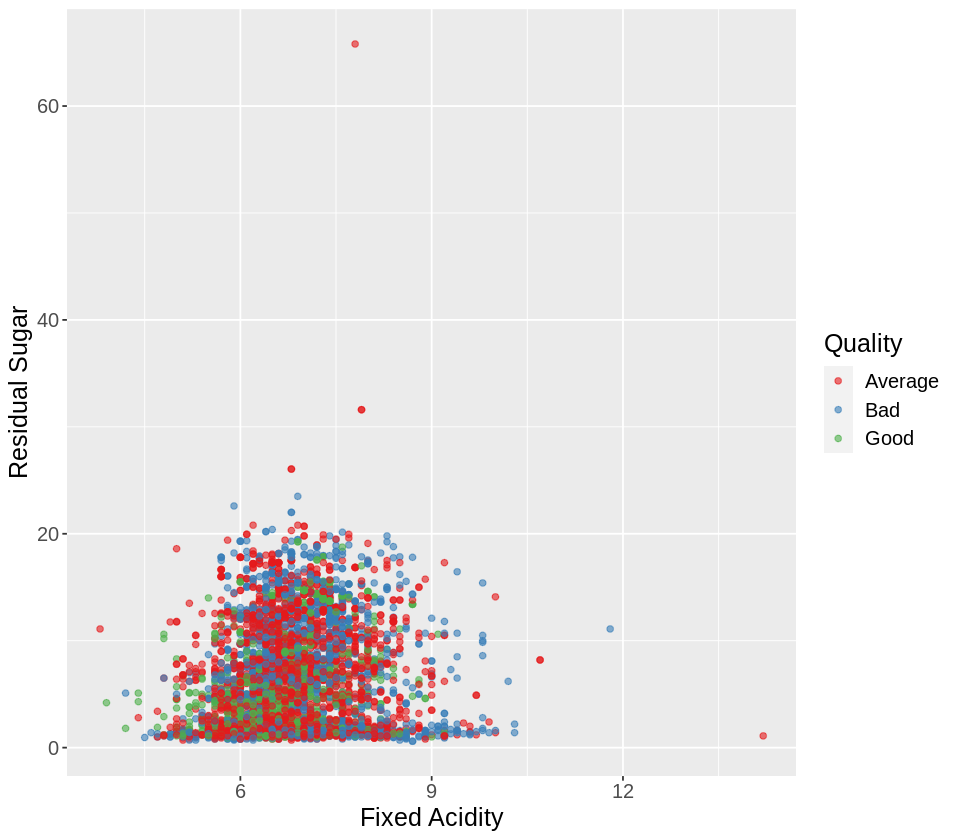

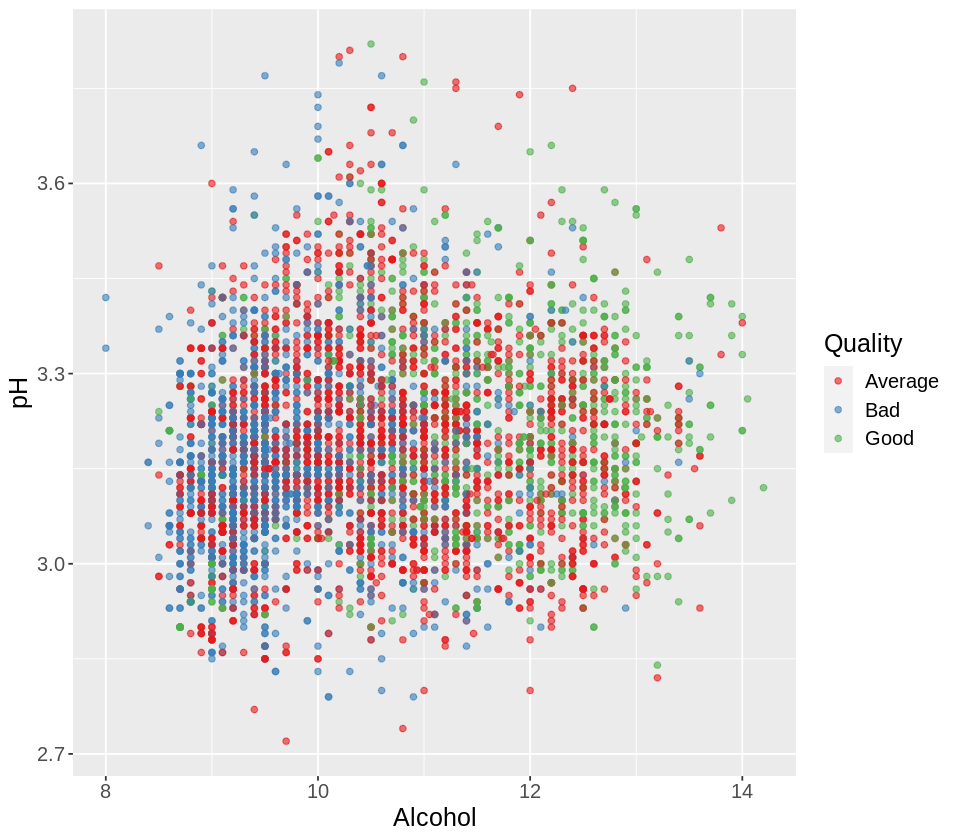

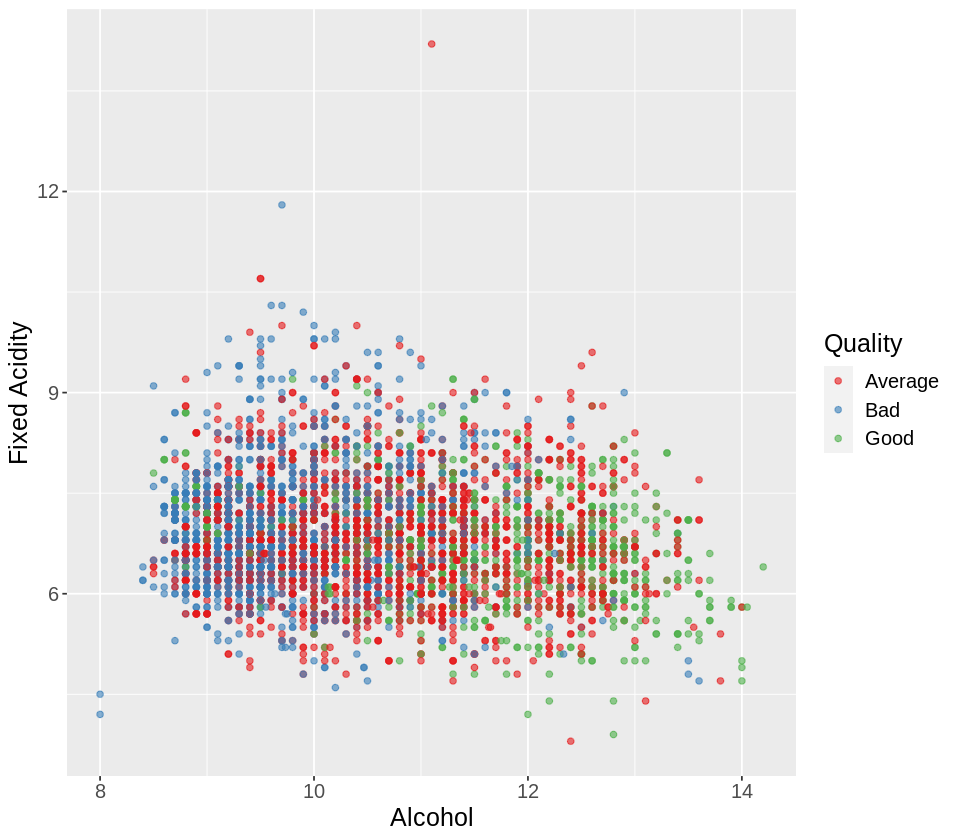

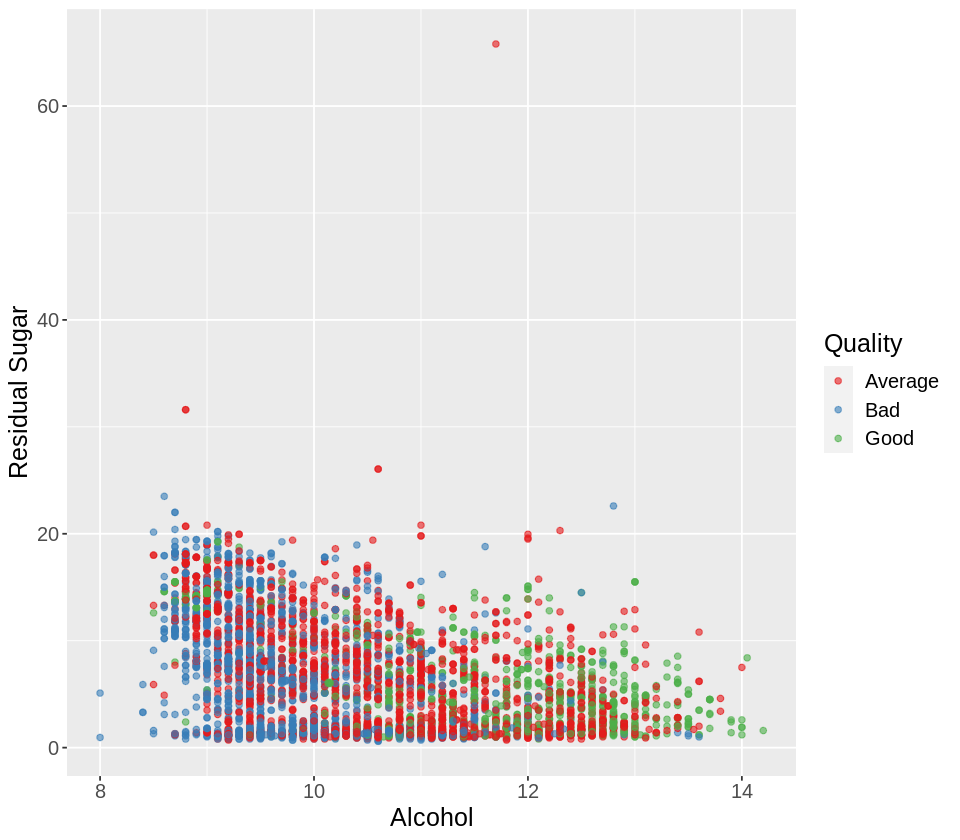

In [4]:
options(repr.plot.width = 8, repr.plot.height = 7)
fixed_vs_sugar <- quality_variables %>%
            ggplot(aes(x = fixed_acid, 
                       y = sugar,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Fixed Acidity", 
                 y = "Residual Sugar",
                 color = "Quality") +
            theme(text = element_text(size = 15)) +
            scale_color_brewer(palette = "Set1")

alc_vs_pH <- quality_variables %>%
            ggplot(aes(x = alcohol, 
                       y = pH,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Alcohol", 
                 y = "pH",
                 color = "Quality") +
            theme(text = element_text(size = 15)) +
            scale_color_brewer(palette = "Set1")

alc_vs_fixed <- quality_variables %>%
            ggplot(aes(x = alcohol, 
                       y = fixed_acid,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Alcohol", 
                 y = "Fixed Acidity",
                 color = "Quality") +
            theme(text = element_text(size = 15)) +
            scale_color_brewer(palette = "Set1")

alc_vs_sugar <- quality_variables %>%
            ggplot(aes(x = alcohol, 
                       y = sugar,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Alcohol", 
                 y = "Residual Sugar",
                 color = "Quality") +
            theme(text = element_text(size = 15)) +
            scale_color_brewer(palette = "Set1")

fixed_vs_sugar
alc_vs_pH
alc_vs_fixed
alc_vs_sugar# Scatter plot to visualize the relationship between the fixed acidity and volatile acidity variables.

In [7]:
wine_recipe <- recipe(quality ~ alcohol + sugar, data = quality_variables) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
        set_engine("kknn") %>%
        set_mode("classification")

knn_fit <- workflow() %>%
        add_recipe(wine_recipe) %>%
        add_model(knn_spec) %>%
        fit(data = wine_train)

knn_fit

wine_test_predictions <- predict(knn_fit, wine_test) %>%
  bind_cols(wine_test) %>%
  metrics(truth = quality, estimate = .pred_class) %>%
  filter(.metric == "accuracy")

wine_test_predictions

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3866769
Best kernel: rectangular
Best k: 3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5806122


In [8]:
wine_split <- initial_split(wine_train, prop = 0.8, strata = quality)
wine_subtrain <- training(wine_split)
wine_validation <- testing(wine_split)

wine_recipe <- recipe(quality ~ alcohol + sugar, data = quality_variables) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
        set_engine("kknn") %>%
        set_mode("classification")

knn_fit <- workflow() %>%
        add_recipe(wine_recipe) %>%
        add_model(knn_spec) %>%
        fit(data = wine_subtrain)

validation_predicted <- predict(knn_fit, wine_validation) %>%
            bind_cols(wine_validation)

# compute the accuracy
acc <- validation_predicted %>%
  metrics(truth = quality, estimate = .pred_class) %>%
  filter(.metric == "accuracy") %>%
  select(.estimate) %>%
  pull()

acc

[1] 0.522293

In [9]:
wine_vfold <- vfold_cv(wine_train, v = 10, strata = quality)

# recreate the standardization recipe from before 
# (since it must be based on the training data)
wine_recipe <- recipe(quality ~ alcohol + sugar, data = wine_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() %>%
  add_recipe(wine_recipe) %>%
  add_model(knn_spec) %>%
  fit_resamples(resamples = wine_vfold)

knn_fit %>% 
  collect_metrics() 

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.5459374,10,0.004820385,Preprocessor1_Model1
roc_auc,hand_till,0.7106819,10,0.004230128,Preprocessor1_Model1


In [10]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() %>%
  add_recipe(wine_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = wine_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5707123,10,0.005263659,Preprocessor1_Model01
6,accuracy,multiclass,0.5359923,10,0.003316189,Preprocessor1_Model02
11,accuracy,multiclass,0.5186375,10,0.006900767,Preprocessor1_Model03
16,accuracy,multiclass,0.5293603,10,0.007571574,Preprocessor1_Model04
21,accuracy,multiclass,0.5270501,10,0.007489336,Preprocessor1_Model05
26,accuracy,multiclass,0.5273058,10,0.007013527,Preprocessor1_Model06
31,accuracy,multiclass,0.5308838,10,0.007471762,Preprocessor1_Model07
36,accuracy,multiclass,0.5306241,10,0.006435899,Preprocessor1_Model08
41,accuracy,multiclass,0.5290889,10,0.006582654,Preprocessor1_Model09


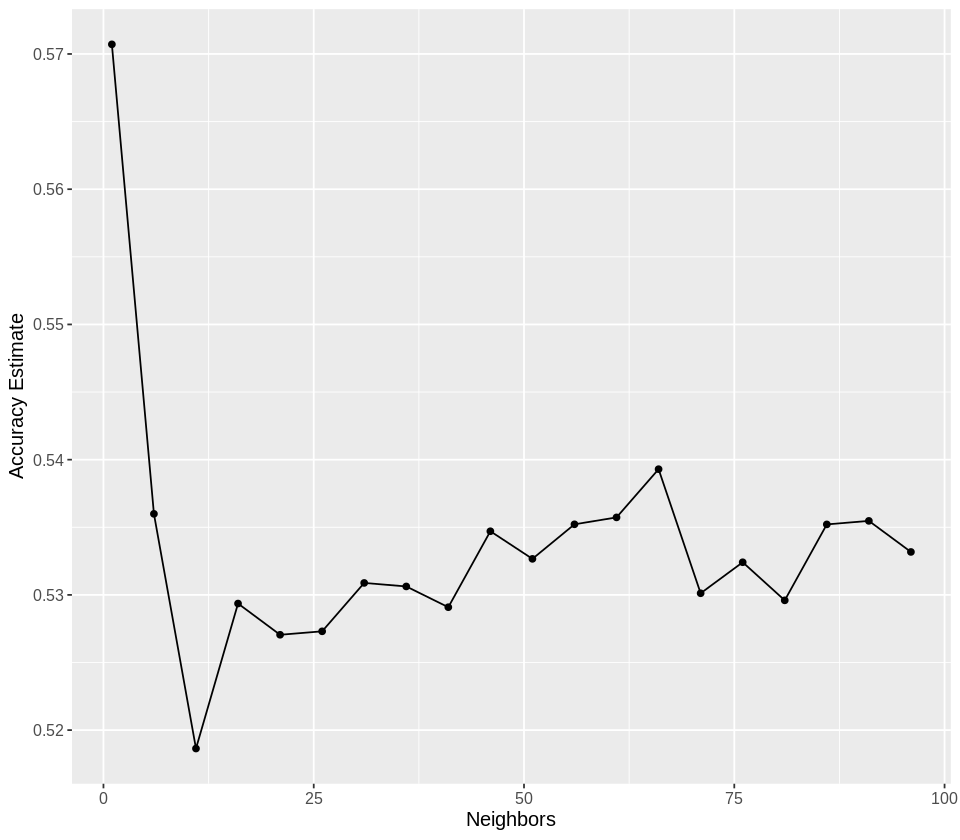

In [12]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

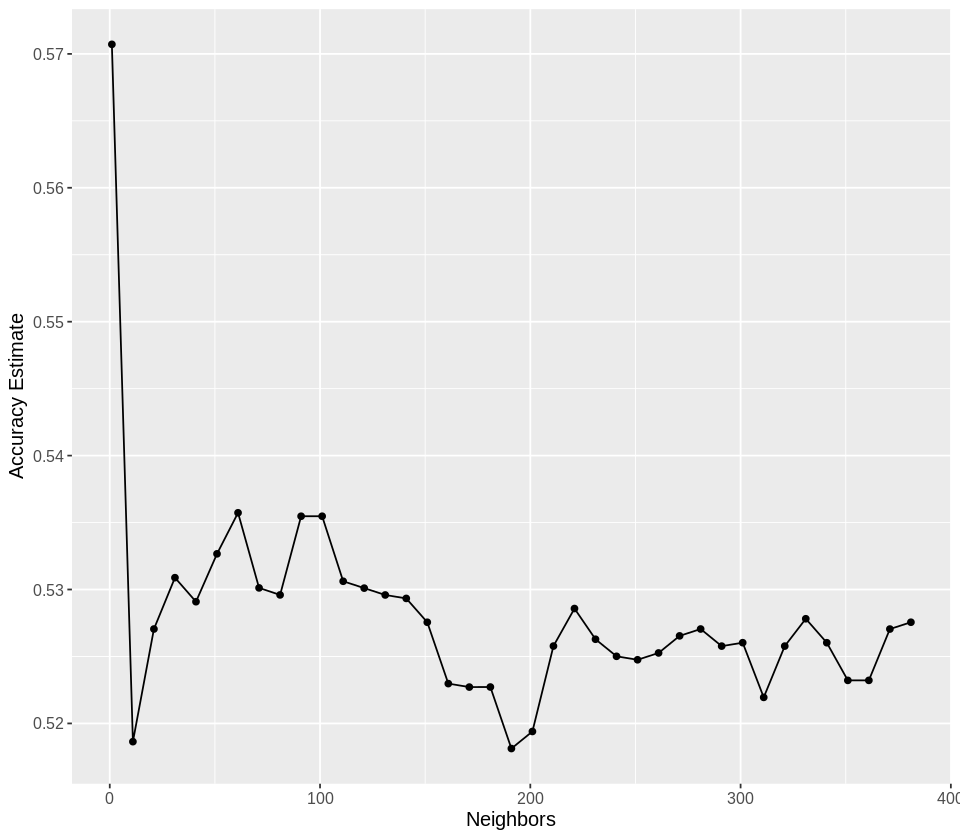

In [13]:
k_lots <- tibble(neighbors = seq(from = 1, to = 385, by = 10))

knn_results <- workflow() %>%
  add_recipe(wine_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = wine_vfold, grid = k_lots) %>%
  collect_metrics()

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracy_vs_k_lots <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k_lots